__Aim:__ Consistency analysis across cell lines using pathway enrichment results to find commonly up/down regulated pathways and their genes. 

___
- https://github.com/abearab/ipage-msigdb
- https://github.com/tanghaibao/goatools
- https://gseapy.readthedocs.io/en/latest/index.html

Hani: _"You must redo iPAGE with `--independence=0` option for comparing results between multiple smaples."_

In [1]:
import re
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from time import time 
from glob import glob
from matplotlib.pyplot import subplots
from itertools import chain
from functools import reduce
from venn import venn

# sys.path.append('/rumi/shams/abe/Projects/ipage-down/')
sys.path.append('/data_gilbert/home/aarab/Projects/pager/')

import upsetplot as us
import ipage_down as ipd
from matplotlib.backends.backend_pdf import PdfPages

from IPython.display import IFrame

In [2]:
pagerdir='/data_gilbert/home/aarab/Projects/pager'

In [3]:
# def get_pvmatrix_list(parent_path,pattern):
#     """
#     pattern: msigdb gene set cluster name 
#     """
#     return glob(f'{parent_path}/*{pattern}*/pvmatrix.txt')

# def get_pv_signal(exp,patterns,pdf=None):
#     """
#     exp: experiment name
#     patterns: list of patterns
#     """
#     cols = pd.concat([
#         ipd.pvmat2bio_signal(ipd.merge_multiple_pvmat(
#             get_pvmatrix_list(f"{exp}_fdr","c1")
#         ),s,n_clust=1) for s in ['up','both','down']
#     ]).columns
    
#     pv_signal = pd.concat([
#         ipd.pvmat2bio_signal(ipd.merge_multiple_pvmat([
#             pvmat for pattern in patterns
#             for pvmat in 
#             get_pvmatrix_list(f"{exp}",pattern) + \
#             get_pvmatrix_list(f"{exp}_fdr",pattern)
#         ]),s,n_clust=2) for s in ['up','both','down']
#     ])
    
#     pv_signal.columns = cols
#     pv_signal=pv_signal[~pv_signal.duplicated()]
    
#     if pdf:
#         pv_signal.to_csv('temp-pvmatrix.txt',sep='\t')
    
#         !bash {pager_dir}/ipage_draw_matrix.sh \
#             {exp}'.txt' "temp-pvmatrix.txt" \
#             {pdf} &> /dev/null
    
#         !rm -v 'temp-pvmatrix.txt'
#     else: 
#         return pv_signal


In [4]:
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

In [5]:
sys.path[-1]

'/data_gilbert/home/aarab/Projects/pager/'

In [6]:
!cat /data_gilbert/home/aarab/Projects/pager/ipage_loop.sh

## $1: input file contain table with first two columns as gene name/id and numeric value
# pattern='msigdb_v0.3_m*'
pattern='msigdb_v7*'


expfile=`basename $1`
outdir=${1/.txt/};

mkdir -p $outdir
cd $outdir; cd ../

for f in `ls -d $PAGEDIR/PAGE_DATA/ANNOTATIONS/${pattern}`; do
    base=`basename "$f"`;
    echo '________________' $base '________________';
    if [ -d "${outdir}/${base}/" ]; 
    then
        echo 'This result exist!';
    else
        # Run iPAGE 
        perl $PAGEDIR/page.pl --expfile=$expfile --species=$base --exptype=continuous --ebins=11 --nodups=1 --independence=0;
            # --independence=0; option for comparing results between multiple smaples.
        wait
        mv -v ${expfile}_PAGE/ ${outdir}/${base}/;
        # remove the result folder if it was empty
        counter="$(wc -l < ${outdir}/${base}/pvmatrix.txt)"
        if [ $counter -le "$(echo '1')" ] || [ -z $counter ]
        then
            rm -r ${outdir}/${base}
        fi;
        rm -r \
  

## $\Delta$Stability

In [8]:
cell_line_pws = {}

In [7]:
# %%bash
# export PAGEDIR='/data_gilbert/home/aarab/iPAGE'

# cd stbl/
# ls *_delta_stbl.txt | parallel -j18 -k bash /data_gilbert/home/aarab/Projects/pager/ipage_loop.sh
# cd ../

### Remake from pvmatrix (correct bin clusters)

### HL-60 time series

#### hl60 6h delta_stbl

In [19]:
study = 'hl60_6h_delta_stbl'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'stbl/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'stbl/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

bio_signal.to_csv(f'stbl/{study}_pvmatrix.txt',sep='\t')
cell_line_pws[study] = bio_signal

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd stbl; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [20]:
pdf = 'stbl/hl60_6h_delta_stbl.pdf'
IFrame(pdf, width=800, height=200)

In [21]:
# gs = 'GOBP_REGULATION_OF_CHOLESTEROL_BIOSYNTHETIC_PROCESS'
# pvmat_list = glob(f'stbl/{study}_ind0/*c5.go*/pvmatrix.txt')
# gs_cluster_path = ipd.detect_gs_cluster(pvmat_list, gs=gs)

# print ([p.split('/')[1:3] for p in gs_cluster_path])

# gs_cluster_path = gs_cluster_path[1].split('pvmatrix.txt')[0]
# print ('Down')
# print (ipd.bin_identifier_genes(gs_cluster_path, '0', gs=gs))
# print ('Up')
# print (ipd.bin_identifier_genes(gs_cluster_path, '9', gs=gs))
# print (ipd.bin_identifier_genes(gs_cluster_path, '10', gs=gs))

#### hl60 72h delta_stbl

In [22]:
study = 'hl60_72h_delta_stbl'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'stbl/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'stbl/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'stbl/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd stbl; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [23]:
pdf = 'stbl/hl60_72h_delta_stbl.pdf'
IFrame(pdf, width=800, height=200)

In [26]:
# # study = 'hl60_72h_delta_stbl'
# study = 'hl60_120h_delta_stbl'

# pvmat = ipd.merge_multiple_pvmat(
#     pvmat_list = glob(f'stbl/{study}/*c3*/pvmatrix.txt') 
#     #+ glob(f'stbl/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
# )

# bio_signal = pd.concat([
#     ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
#     ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
#     ipd.pvmat2bio_signal(pvmat,side='both'),
# ],axis=0)

# bio_signal


In [27]:
# gs = 'MIR193A_3P_MIR193B_3P'
# pvmat_list = glob(f'stbl/{study}/*c3*/pvmatrix.txt')
# gs_cluster_path = ipd.detect_gs_cluster(pvmat_list, gs=gs)

# print ([p.split('/')[1:3] for p in gs_cluster_path])

# gs_cluster_path = gs_cluster_path[0].split('pvmatrix.txt')[0]
# print ('Down')
# print (ipd.bin_identifier_genes(gs_cluster_path, '0', gs=gs))
# # print (ipd.bin_identifier_genes(gs_cluster_path, '1', gs=gs))
# # print (ipd.bin_identifier_genes(gs_cluster_path, '2', gs=gs))
# # print (ipd.bin_identifier_genes(gs_cluster_path, '3', gs=gs))
# print ('Up')
# print (ipd.bin_identifier_genes(gs_cluster_path, '9', gs=gs))
# print (ipd.bin_identifier_genes(gs_cluster_path, '10', gs=gs))

#### hl60 120h delta_stbl

In [30]:
study = 'hl60_120h_delta_stbl'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'stbl/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'stbl/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'stbl/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd stbl; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [31]:
pdf = 'stbl/hl60_120h_delta_stbl.pdf'
IFrame(pdf, width=800, height=200)

In [32]:
# gs = 'GOBP_RESPONSE_TO_STEROL'
# pvmat_list = glob(f'stbl/{study}_ind0/*c5.go*/pvmatrix.txt')
# gs_cluster_path = ipd.detect_gs_cluster(pvmat_list, gs=gs)

# print ([p.split('/')[1:3] for p in gs_cluster_path])

# gs_cluster_path = gs_cluster_path[1].split('pvmatrix.txt')[0]
# print ('Down')
# print (ipd.bin_identifier_genes(gs_cluster_path, '0', gs=gs))
# print ('Up')
# print (ipd.bin_identifier_genes(gs_cluster_path, '9', gs=gs))
# print (ipd.bin_identifier_genes(gs_cluster_path, '10', gs=gs))

In [33]:
# ind1 = 'hl60_120h_delta_stbl_ind1'
# ipd.clean_bins_range(
#     pd.concat([
#         ipd.read_pvmatrix(f'stbl/{ind1}/msigdb_v7.4_c5.all/pvmatrix.L.txt'),
#         ipd.read_pvmatrix(f'stbl/{ind1}/msigdb_v7.4_c5.all/pvmatrix.R.txt')
#     ])
# ).drop_duplicates().to_csv(f"stbl/{ind1.replace('_ind1','_pvmatrix')}.txt",sep = '\t')

#### molm14_delta_stbl

In [34]:
study = 'molm14_delta_stbl'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'stbl/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'stbl/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'stbl/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd stbl; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [35]:
pdf = 'stbl/molm14_delta_stbl.pdf'
IFrame(pdf, width=800, height=200)

#### ociaml2_delta_stbl

In [37]:
study = 'ociaml2_delta_stbl'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'stbl/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'stbl/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'stbl/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd stbl; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [38]:
pdf = 'stbl/ociaml2_delta_stbl.pdf'
IFrame(pdf, width=800, height=200)

#### ociaml3_delta_stbl

In [39]:
study = 'ociaml3_delta_stbl'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'stbl/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'stbl/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'stbl/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd stbl; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [40]:
pdf = 'stbl/ociaml3_delta_stbl.pdf'
IFrame(pdf, width=800, height=200)

#### kg1_delta_stbl

In [41]:
study = 'kg1_delta_stbl'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'stbl/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'stbl/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'stbl/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd stbl; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [42]:
pdf = 'stbl/kg1_delta_stbl.pdf'
IFrame(pdf, width=800, height=200)

#### thp1_delta_stbl

In [43]:
study = 'thp1_delta_stbl'

pvmat = ipd.merge_multiple_pvmat(
    pvmat_list = glob(f'stbl/{study}/*c5.go*/pvmatrix.txt') #+ glob(f'stbl/{study}_ind1/*c2.cp.kegg*/pvmatrix.txt')
)

bio_signal = pd.concat([
    ipd.pvmat2bio_signal(pvmat,side='down',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='up',n_clust=1),
    ipd.pvmat2bio_signal(pvmat,side='both'),
],axis=0)

cell_line_pws[study] = bio_signal

bio_signal.to_csv(f'stbl/{study}_pvmatrix.txt',sep='\t')

exp_file = f'{study}.txt'
pvmat_file = f'{study}_pvmatrix.txt'
pdf_file = f'{study}.pdf'

!cd stbl; bash {pagerdir}/ipage_draw_matrix.sh $exp_file $pvmat_file $pdf_file &> /dev/null; cd ../

In [44]:
pdf = 'stbl/thp1_delta_stbl.pdf'
IFrame(pdf, width=800, height=200)

# Intersection 

In [46]:
for name in cell_line_pws:
    cell_line_pws[name].columns = list(range(11))

In [61]:
df = pd.concat(
    [ipd.pvmat2bio_signal(pd.concat(cell_line_pws,axis=0),s,n_clust=n) for n in [1,2,3] for s in ['up','both','down']] 
).drop_duplicates()

df = df.reset_index()#.set_index(['level_1','level_0']).sort_index(0)
# df.index.names = [None,None]
df = df.rename(columns={'level_0':'line','level_1':'GO'})

In [49]:
%reload_ext rpy2.ipython

In [51]:
%%R 
library(ggplot2)
library(tidyverse)

In [53]:
%%R
library(pheatmap)
library(RColorBrewer)
library(viridis)

# makeColorRampPalette <- function(colors, cutoff.fraction, num.colors.in.palette)
# {
#   stopifnot(length(colors) == 4)
#   ramp1 <- colorRampPalette(colors[1:2])(num.colors.in.palette * cutoff.fraction)
#   ramp2 <- colorRampPalette(colors[3:4])(num.colors.in.palette * (1 - cutoff.fraction))
#   return(c(ramp1, ramp2))
# }

breaksList = seq(-3,3,by = 1)

In [181]:
%%R -i df
df <- df %>% remove_rownames() %>%
    mutate(line=gsub("_delta_stbl",'',line)) %>%
    mutate(GO=gsub("GOBP_",'GOBP | ',GO)) %>%
    mutate(GO=gsub("GOMF_",'GOMF | ',GO)) %>%
    mutate(GO=gsub("GOCC_",'GOCC | ',GO)) %>%
    # mutate(name=paste0(GO,'-',line)) %>%
    dplyr::filter(grepl("GOBP",GO)) %>%
    # group_by(GO) %>% filter( n() > 1 ) %>% 
    column_to_rownames('GO') 

In [201]:
%%R
mat_colors <- list(group = brewer.pal(7, "RdBu"))$group
greens <- brewer.pal(n = 4, name = "Greens")
set1 <- brewer.pal(n = 6, name = "Reds")
set2 <- c(
    brewer.pal(n = 30, name = "Reds"),brewer.pal(n = 30, name = "Blues"),
    brewer.pal(n = 16, name = "Set2"),brewer.pal(n = 16, name = "Set1")
    # brewer.pal(n = 30, name = "RdBu")
         )

In [202]:
%%R
df$line %>% unique

[1] "hl60_6h"   "hl60_120h" "kg1"       "ociaml3"   "thp1"      "hl60_72h" 
[7] "ociaml2"   "molm14"   


In [203]:
%%R 
go_col = c()
go_names = df$GO %>% unique

for (i in c(1:length(go_names))){
    go_col[go_names[i]]=set2[i]
}

ann_colors = list(
    line = c(
        "hl60_6h"=greens[1],
        "hl60_72h"=greens[2],
        "hl60_120h"=greens[3],
        "kg1"=set1[1],
        "molm14"=set1[2],
        "ociaml3"=set1[4],
        "ociaml2"=set1[5],
        "thp1"=set1[6]
    )
    # ,    GO=go_col
)

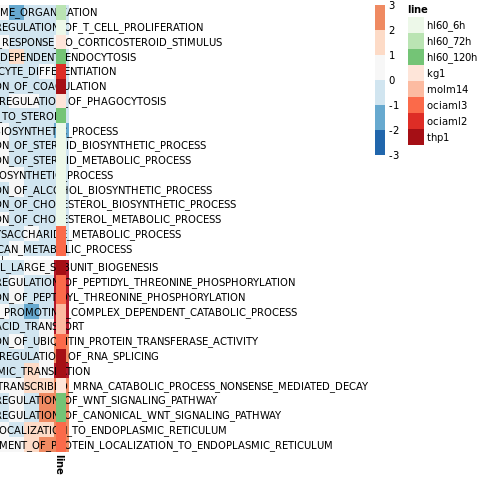

In [204]:
%%R
df %>% dplyr::select(-c(line)) %>% 
    pheatmap(
        cluster_cols=F,
        cluster_rows=T,
        cutree_rows=2,
        show_rownames=T,
        show_colnames=F,
        vmin=-3,vmax=3,
        annotation_row = df %>%select(line),
        color = mat_colors[length(mat_colors):-1:1],
        border_color = F,
        breaks = breaksList,
        annotation_colors = ann_colors
        
    ) -> pw_ht

In [205]:
%%R 
pdf("figures/cell-line-consistency-stbl-GO.pdf",width=12, height=8)
grid::grid.newpage()
grid::grid.draw(pw_ht$gtable)

dev.off()

png 
  2 


# 
___

In [273]:
!date

Tue Feb  8 17:38:38 PST 2022
